1) Importing Libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

2) Load the dataset

In [65]:
df = pd.read_csv('titanic.csv')

 3) Checking for Null Values

In [66]:
print(df.isnull().sum())
print("\nData after checking for Null Values:")
print(df.head())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data after checking for Null Values:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin

4) Data Visualization

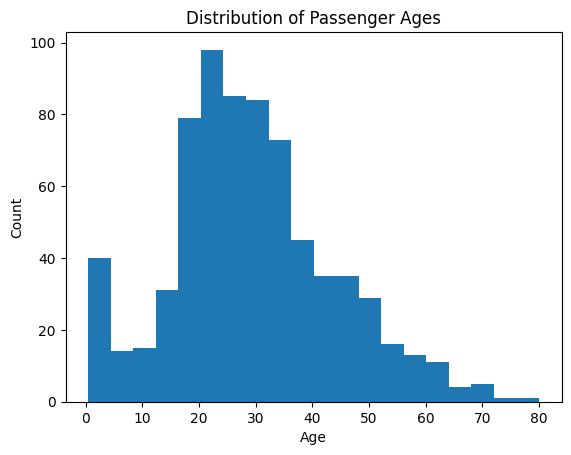

In [67]:
# Example: Plot a histogram of passenger ages
plt.hist(df['Age'].dropna(), bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Passenger Ages')
plt.show()


5) Outlier Detection using IQR (Interquartile Range)

In [68]:
# Calculate the IQR for numerical columns
Q1 = df[['Age', 'Fare']].quantile(0.25)
Q3 = df[['Age', 'Fare']].quantile(0.75)
IQR = Q3 - Q1

# Define a multiplier (e.g., 1.5) to determine the outlier threshold
threshold = 1.5

# Identify outliers
outliers = ((df[['Age', 'Fare']] < (Q1 - threshold * IQR)) | (df[['Age', 'Fare']] > (Q3 + threshold * IQR))).any(axis=1)

# Remove the rows containing outliers
df_no_outliers = df[~outliers]

print(f"Number of outliers detected: {outliers.sum()}")
print("Data after removing outliers:")
print(df_no_outliers.head())


Number of outliers detected: 126
Data after removing outliers:
   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    male  22.0      1      0   
2                        Heikkinen, Miss. Laina  female  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. William Henry    male  35.0      0      0   
5                              Moran, Mr. James    male   NaN      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  
5            33

6) Splitting Dependent and Independent Variables

In [69]:
X = df.drop('Survived', axis=1)  # Independent variables/features
y = df['Survived']  # Dependent variable/target
print("X (Independent Variables):")
print(X.head())
print("\ny (Dependent Variable):")
print(y.head())

X (Independent Variables):
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  

y (Dependent Variable):
0    0
1    1
2    1
3    1
4    0
Name: 

7) Perform Encoding

In [70]:
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['Embarked'] = label_encoder.fit_transform(X['Embarked'])
print("Data after Encoding:")
print(X.head())

Data after Encoding:
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare Cabin  Embarked  
0    1  22.0      1      0         A/5 21171   7.2500   NaN         2  
1    0  38.0      1      0          PC 17599  71.2833   C85         0  
2    0  26.0      0      0  STON/O2. 3101282   7.9250   NaN         2  
3    0  35.0      1      0            113803  53.1000  C123         2  
4    1  35.0      0      0            373450   8.0500   NaN         2  


8) Feature Scaling

In [71]:
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])
print("Data after Feature Scaling:")
print(X.head())

Data after Feature Scaling:
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

   Sex       Age  SibSp  Parch            Ticket      Fare Cabin  Embarked  
0    1 -0.530377      1      0         A/5 21171 -0.502445   NaN         2  
1    0  0.571831      1      0          PC 17599  0.786845   C85         0  
2    0 -0.254825      0      0  STON/O2. 3101282 -0.488854   NaN         2  
3    0  0.365167      1      0            113803  0.420730  C123         2  
4    1  0.365167      0      0            373450 -0.486337   NaN         2  


9) Splitting Data into Train and Test

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train (Training Data):")
print(X_train.head())
print("\nX_test (Testing Data):")
print(X_test.head())
print("\ny_train (Training Labels):")
print(y_train.head())
print("\ny_test (Testing Labels):")
print(y_test.head())

X_train (Training Data):
     PassengerId  Pclass                                Name  Sex       Age  \
331          332       1                 Partner, Mr. Austen    1  1.088491   
733          734       2          Berriman, Mr. William John    1 -0.461489   
382          383       3                  Tikkanen, Mr. Juho    1  0.158503   
704          705       3             Hansen, Mr. Henrik Juul    1 -0.254825   
813          814       3  Andersson, Miss. Ebba Iris Alfrida    0 -1.632584   

     SibSp  Parch             Ticket      Fare Cabin  Embarked  
331      0      0             113043 -0.074583  C124         2  
733      0      0              28425 -0.386671   NaN         2  
382      0      0  STON/O 2. 3101293 -0.488854   NaN         2  
704      1      0             350025 -0.490280   NaN         2  
813      4      2             347082 -0.018709   NaN         2  

X_test (Testing Data):
     PassengerId  Pclass                                               Name  \
709    